In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, GRU, LSTM, Dense, Bidirectional

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col=0)
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [8]:
minv = df['Passengers'].min()
maxv = df['Passengers'].max()
df['Passengers'] = (df['Passengers'] - minv) / (maxv - minv) # Normalize the 'Passengers' column to the range [0, 1]

df['Passengers2'] = df['Passengers'].shift(-1) # Create a new column 'Passengers2' which is the next value of 'Passengers'

df = df[:-1] # Remove the last row since it has NaN in 'Passengers2'

thr = int(len(df) * 0.67) # Split the data into training and testing sets (67% train, 33% test)
train_df = df[:thr]
test_df = df[thr:]

trainX = np.expand_dims(train_df['Passengers'].values, axis=(1,2)) 
trainY = train_df['Passengers2'].values

testX = np.expand_dims(test_df['Passengers'].values, axis=(1,2))
testY = test_df['Passengers2'].values

In [9]:
df

,Passengers,Passengers2
Month,,
1949-01,0.015444,0.027027
1949-02,0.027027,0.054054
1949-03,0.054054,0.048263
1949-04,0.048263,0.032819
1949-05,0.032819,0.059846
...,...,...
1960-07,1.000000,0.969112
1960-08,0.969112,0.779923
1960-09,0.779923,0.689189


In [10]:
from tqdm.keras import TqdmCallback

results_dict = {} # Dictionary to store results for each model

for bdr in [True, False]:
    for tp in [SimpleRNN, GRU, LSTM]:
        for units in [2, 8, 16]:
            model = Sequential()
            if bdr:
                model.add(Bidirectional(tp(units, input_shape=(1, 1))) )
            else:
                model.add(tp(units, input_shape=(1, 1)))

            model.add(Dense(1))
            
            model.compile(loss='mse', optimizer='adam')

            print(tp.__name__, f"Bidirectional={bdr}", 'units:', units)
            
            history = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=0, callbacks=[TqdmCallback(verbose=0)])

            trainPredict = model.predict(trainX, verbose=0)
            testPredict = model.predict(testX, verbose=0)

            results_dict.setdefault(tp.__name__, {}).setdefault(f"Bidirectional={bdr}", {})[units] = {'train_p': trainPredict, 'test_p': testPredict}
        
        

/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


SimpleRNN Bidirectional=True units: 2


100%|██████████| 25/25 [00:02<00:00,  9.88epoch/s, loss=0.00212]


SimpleRNN Bidirectional=True units: 8


100%|██████████| 25/25 [00:02<00:00,  9.27epoch/s, loss=0.00244]


SimpleRNN Bidirectional=True units: 16


100%|██████████| 25/25 [00:02<00:00,  9.59epoch/s, loss=0.00246]


GRU Bidirectional=True units: 2


100%|██████████| 25/25 [00:02<00:00,  8.65epoch/s, loss=0.00203]


GRU Bidirectional=True units: 8


100%|██████████| 25/25 [00:02<00:00,  8.72epoch/s, loss=0.00209]


GRU Bidirectional=True units: 16


100%|██████████| 25/25 [00:02<00:00,  8.82epoch/s, loss=0.00217]


LSTM Bidirectional=True units: 2


100%|██████████| 25/25 [00:02<00:00,  8.77epoch/s, loss=0.00198]


LSTM Bidirectional=True units: 8


100%|██████████| 25/25 [00:03<00:00,  8.02epoch/s, loss=0.00203]


LSTM Bidirectional=True units: 16


100%|██████████| 25/25 [00:03<00:00,  8.19epoch/s, loss=0.00219]


SimpleRNN Bidirectional=False units: 2


100%|██████████| 25/25 [00:01<00:00, 13.79epoch/s, loss=0.00204]


SimpleRNN Bidirectional=False units: 8


100%|██████████| 25/25 [00:01<00:00, 14.68epoch/s, loss=0.00213]


SimpleRNN Bidirectional=False units: 16


100%|██████████| 25/25 [00:01<00:00, 14.89epoch/s, loss=0.0021] 


GRU Bidirectional=False units: 2


100%|██████████| 25/25 [00:01<00:00, 12.98epoch/s, loss=0.00202]


GRU Bidirectional=False units: 8


100%|██████████| 25/25 [00:01<00:00, 13.06epoch/s, loss=0.00209]


GRU Bidirectional=False units: 16


100%|██████████| 25/25 [00:02<00:00, 11.19epoch/s, loss=0.00206]


LSTM Bidirectional=False units: 2


100%|██████████| 25/25 [00:01<00:00, 13.90epoch/s, loss=0.0021] 


LSTM Bidirectional=False units: 8


100%|██████████| 25/25 [00:01<00:00, 14.03epoch/s, loss=0.00202]


LSTM Bidirectional=False units: 16


100%|██████████| 25/25 [00:01<00:00, 14.05epoch/s, loss=0.00212]


In [11]:
def renormalize(data):
    return data * (maxv - minv) + minv

In [12]:
for e in results_dict:
    print(e)

SimpleRNN
GRU
LSTM


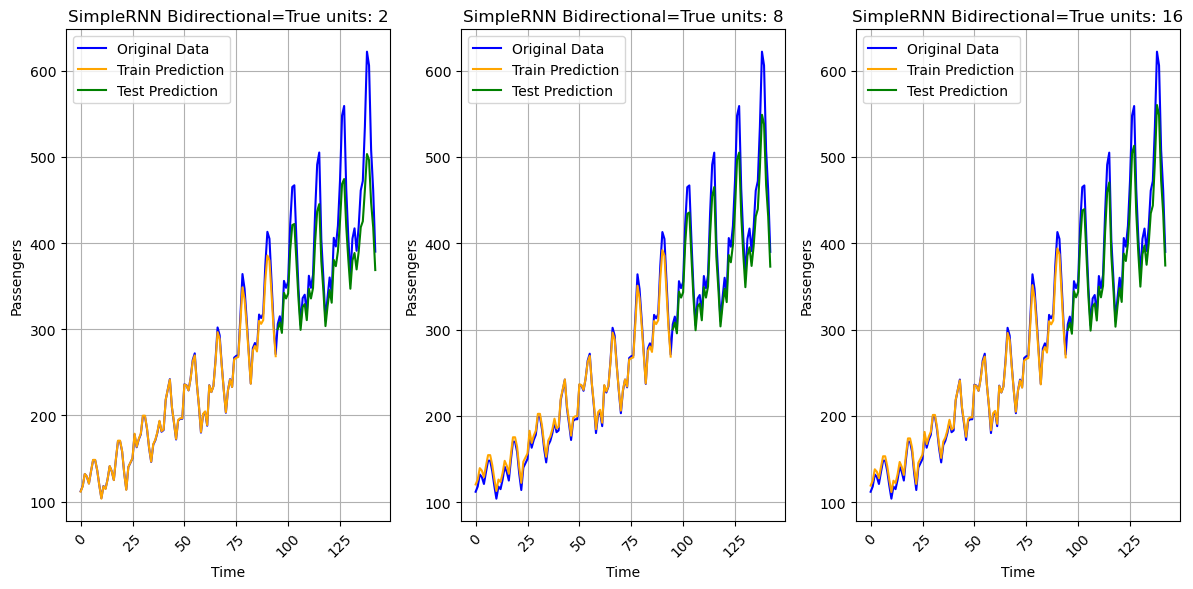

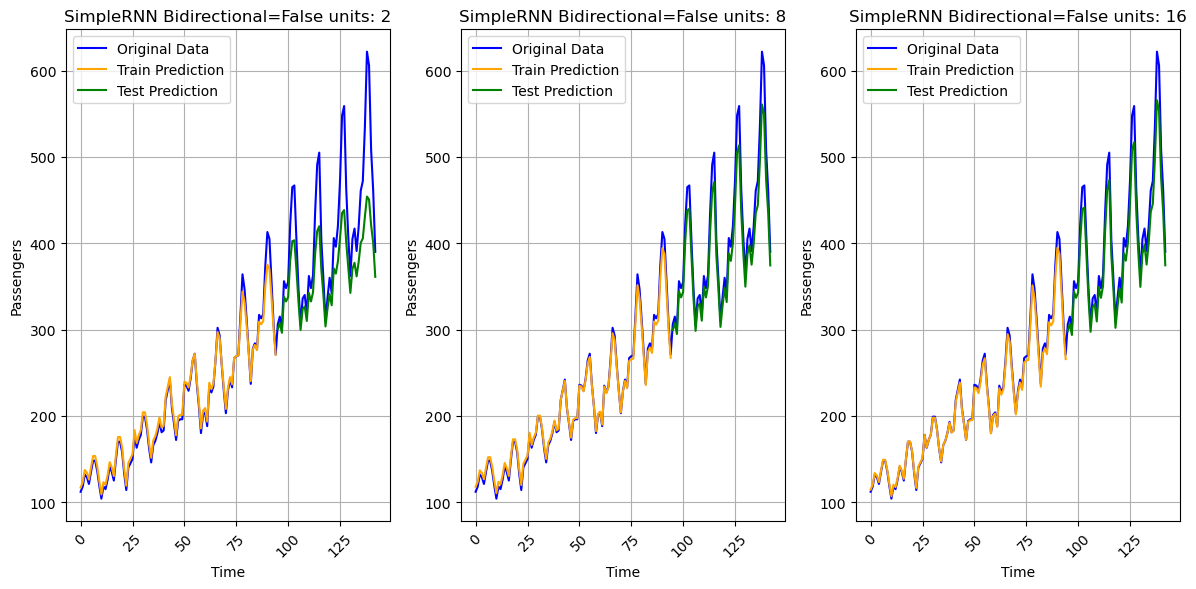

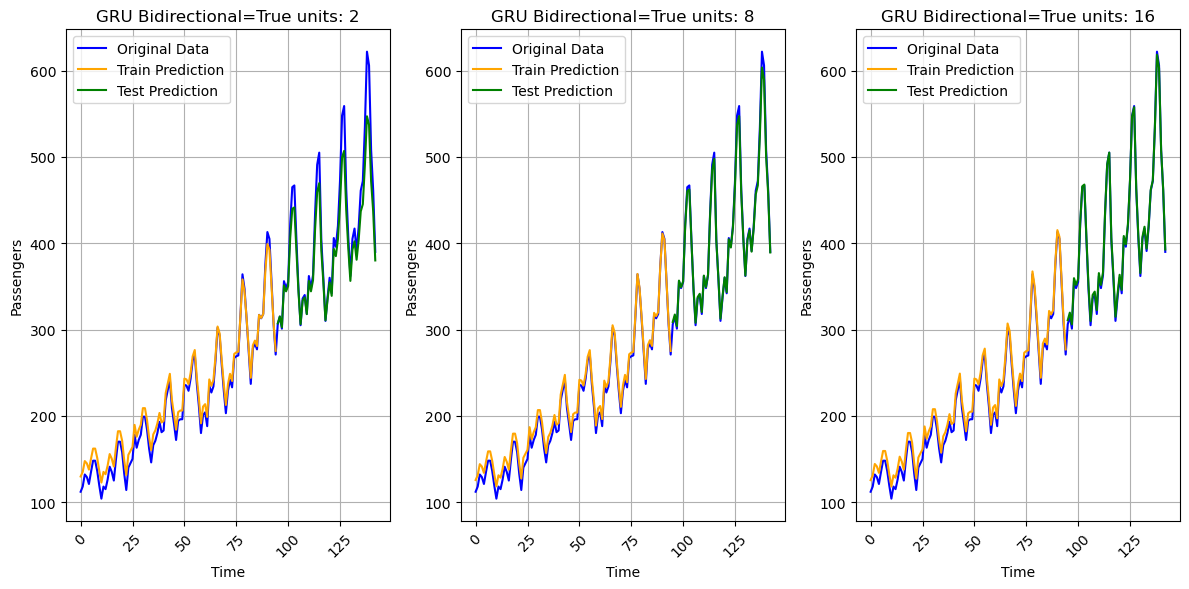

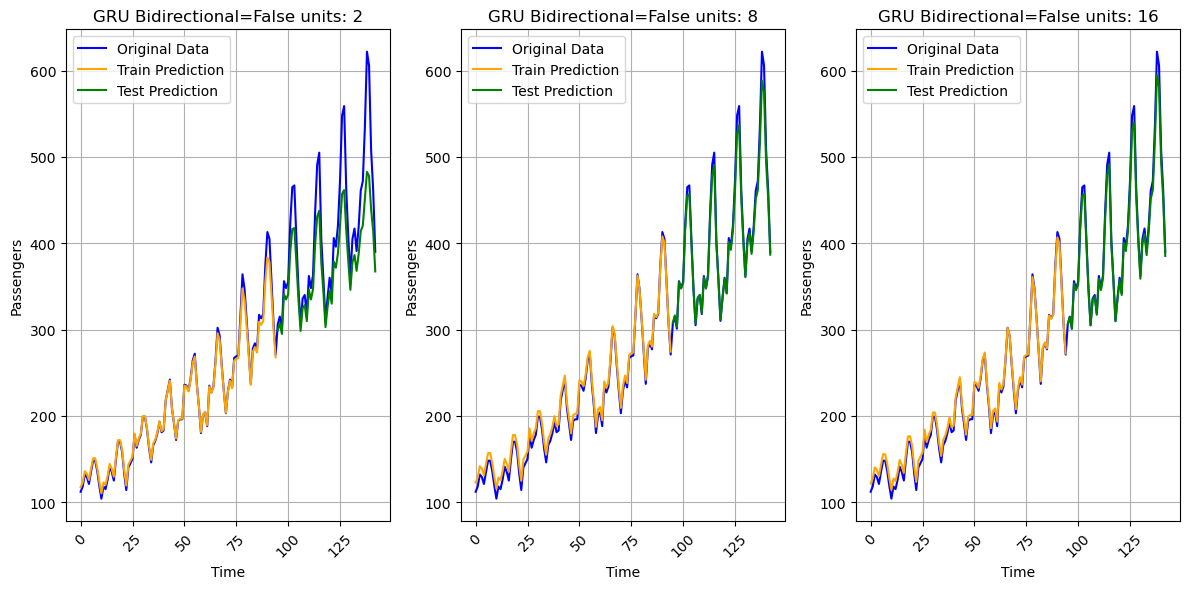

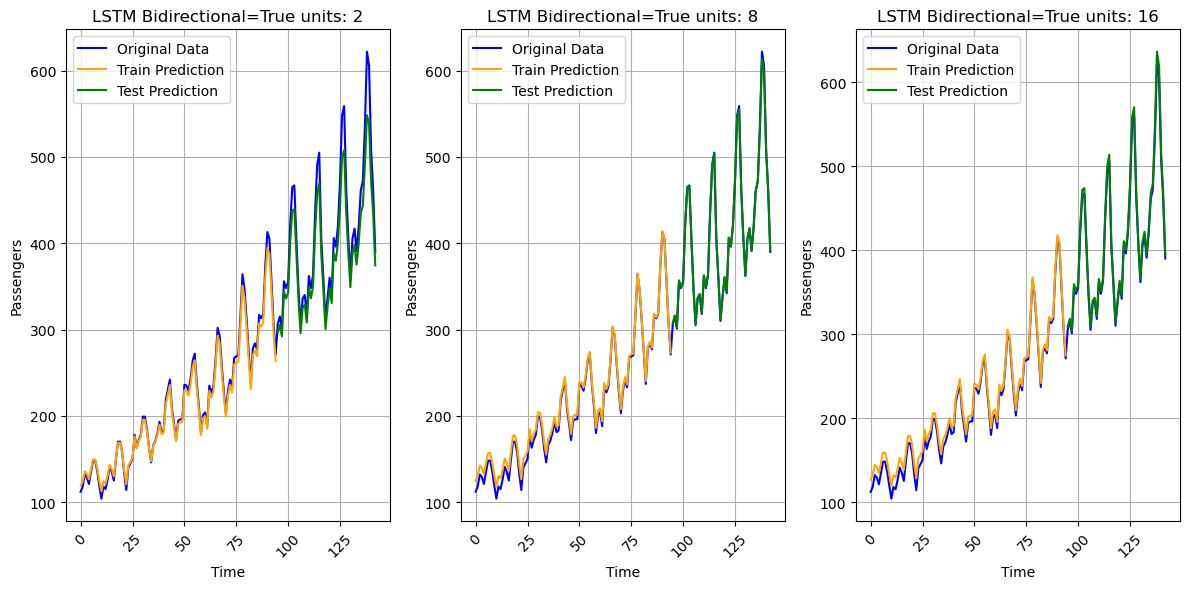

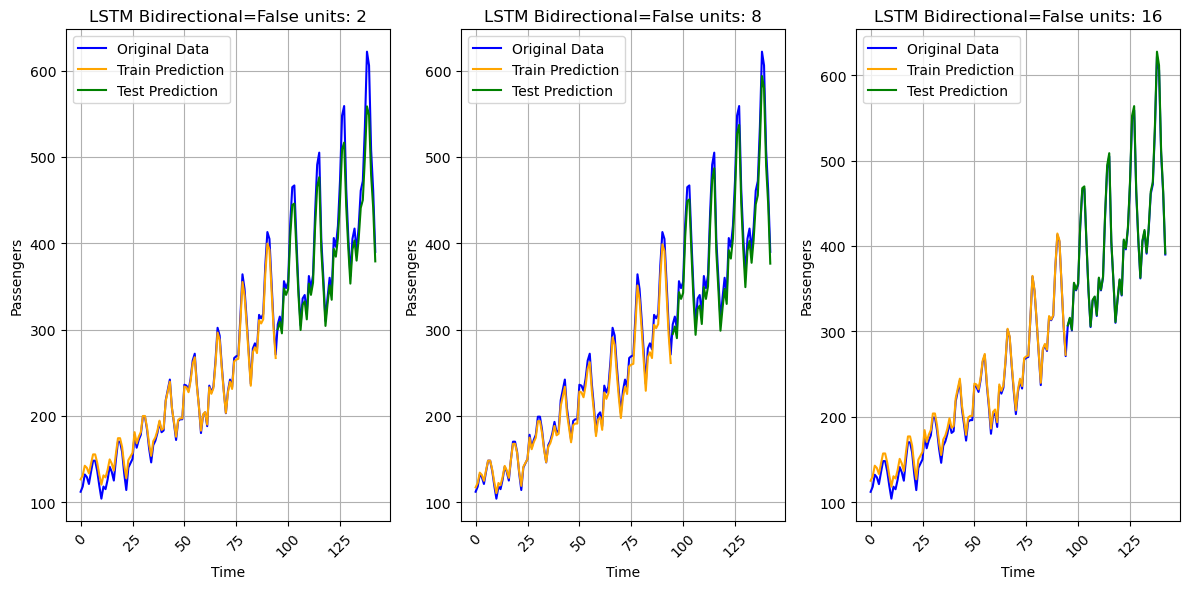

In [13]:
for cell, d1 in results_dict.items():
    for bdr, d2 in d1.items():
        plt.figure(figsize=(12, 6))
        for i, (units, metrics) in enumerate(d2.items()):

            plt.subplot(1, len(d2), i + 1)

            plt.plot(renormalize(df['Passengers'].values), label='Original Data', color='blue')
            plt.plot(renormalize(metrics['train_p']), label='Train Prediction', color='orange')

            plt.plot(range(thr, len(df)), renormalize(metrics['test_p']), label='Test Prediction', color='green')
            plt.xlabel('Time')
            plt.ylabel('Passengers')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()
            plt.title(f"{cell} {bdr} units: {units}")
            plt.legend()

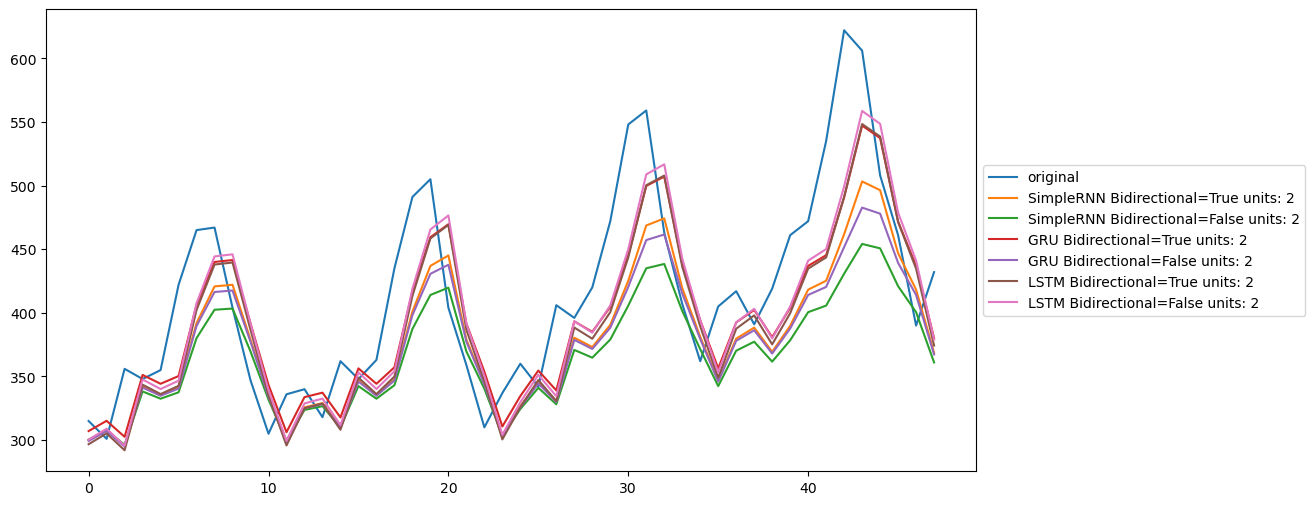

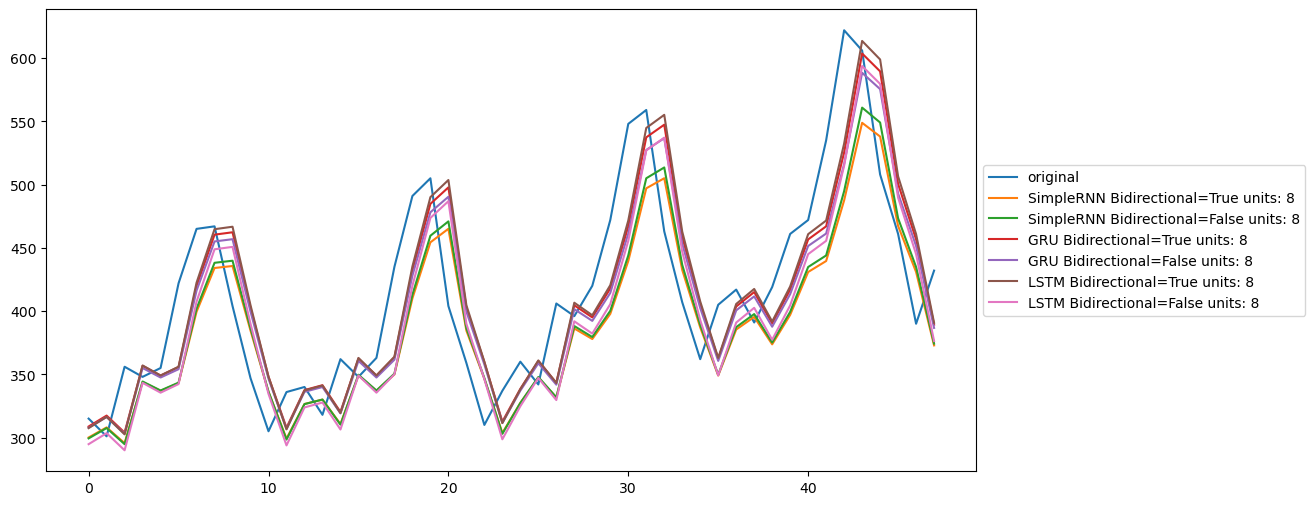

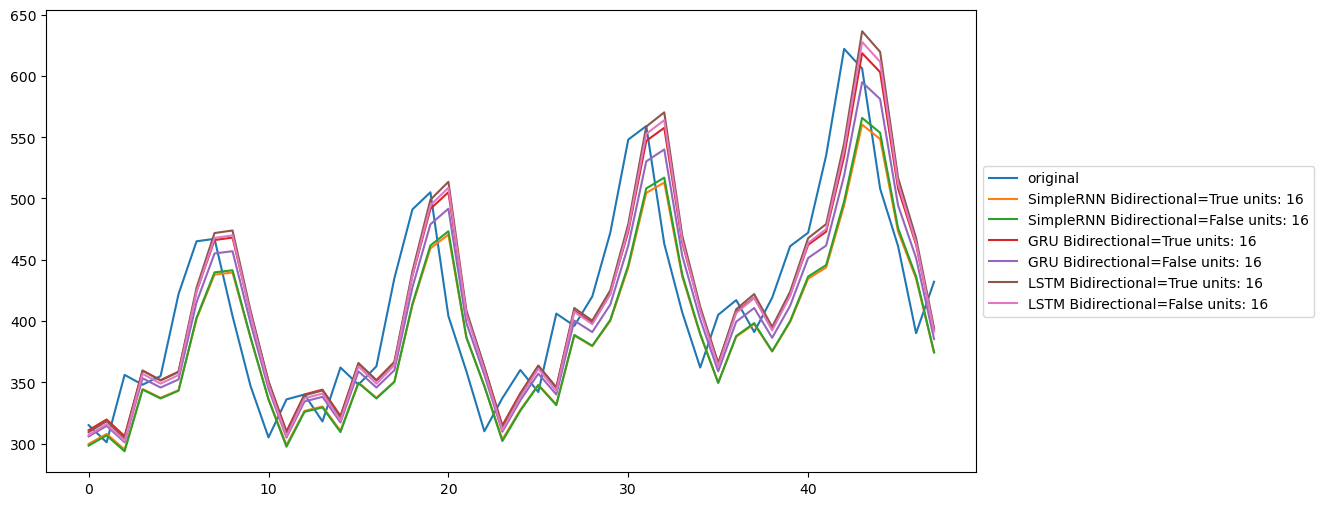

In [14]:
for i, units in enumerate([2, 8, 16]):
    plt.figure(figsize=(12, 6))
    plt.plot(renormalize(testY), label='original')
    for cell, d1 in results_dict.items():
        for bdr, d2 in d1.items():
            plt.plot( renormalize(d2[units]['test_p']), label=f"{cell} {bdr} units: {units}")
            plt.title
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# DRNN / stacked RNN

In [15]:
model = Sequential()
model.add(LSTM(2, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(2, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(2, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [16]:
history = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=0, callbacks=[TqdmCallback(verbose=0)])

trainPredict = model.predict(trainX, verbose=0)
testPredict = model.predict(testX, verbose=0)


100%|██████████| 25/25 [00:04<00:00,  6.08epoch/s, loss=0.00215]


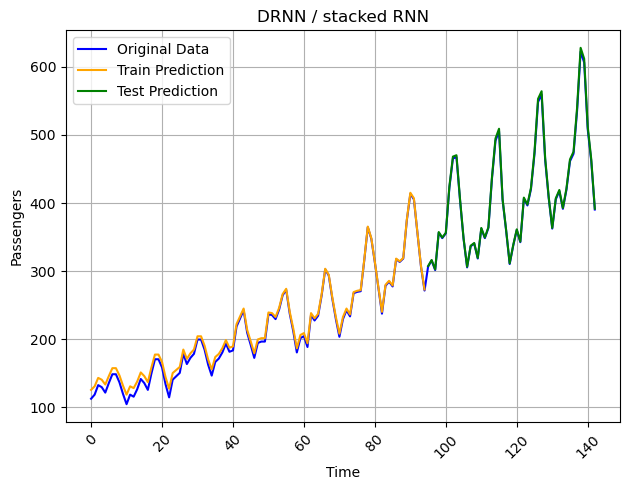

In [18]:
plt.plot(renormalize(df['Passengers'].values), label='Original Data', color='blue')
plt.plot(renormalize(metrics['train_p']), label='Train Prediction', color='orange')

plt.plot(range(thr, len(df)), renormalize(metrics['test_p']), label='Test Prediction', color='green')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.title("DRNN / stacked RNN")
plt.legend()